In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
sentiment_data = pd.read_csv("sentiment_integrado.csv")

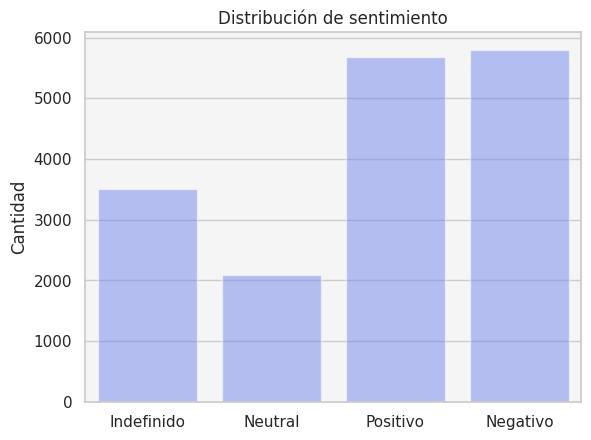

In [6]:
sns.set(style="whitegrid", rc={"axes.facecolor": "#f5f5f5"})
ax = sns.countplot(x='sentimiento', data=sentiment_data, color='#5f78ff', alpha=0.5).set_title('Distribución de sentimiento')
plt.xlabel(None)
plt.ylabel('Cantidad')
plt.show()

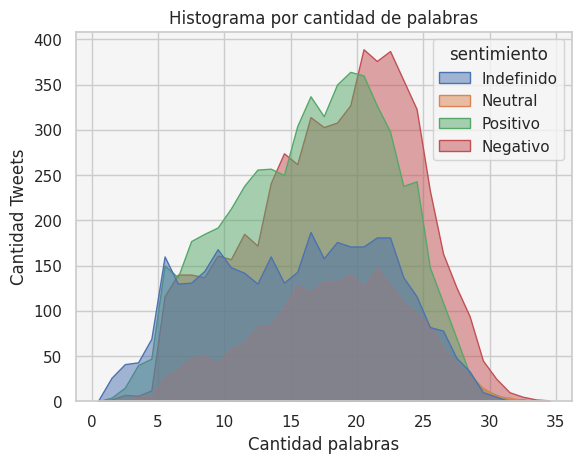

In [8]:
sns.set(style="whitegrid", rc={"axes.facecolor": "#f5f5f5"})
ax = sns.histplot(x='Cantidad palabras', data=sentiment_data, color='#5f78ff', alpha=0.5, binrange=(0, 35),  bins=35, hue='sentimiento', element='poly').set_title('Histograma por cantidad de palabras')
plt.ylabel('Cantidad Tweets')
plt.show()

### Conclusiones:
- Se observan que los negativos tienden a tener mayor cantidad de palabras

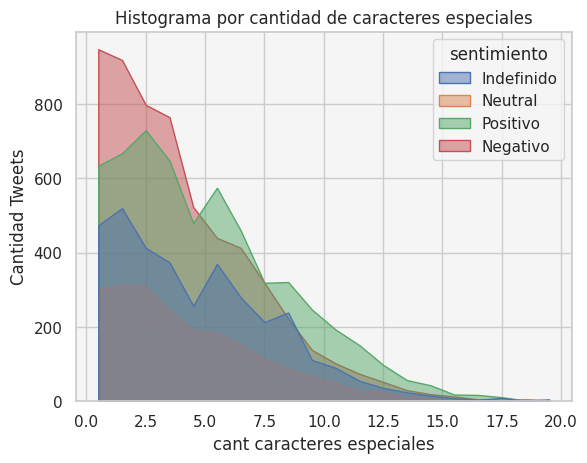

In [10]:
sns.set(style="whitegrid", rc={"axes.facecolor": "#f5f5f5"})
ax = sns.histplot(x='cant caracteres especiales', data=sentiment_data, color='#5f78ff', alpha=0.5, binrange=(0, 20),  bins=20, hue='sentimiento', element='poly').set_title('Histograma por cantidad de caracteres especiales')
plt.ylabel('Cantidad Tweets')
plt.show()

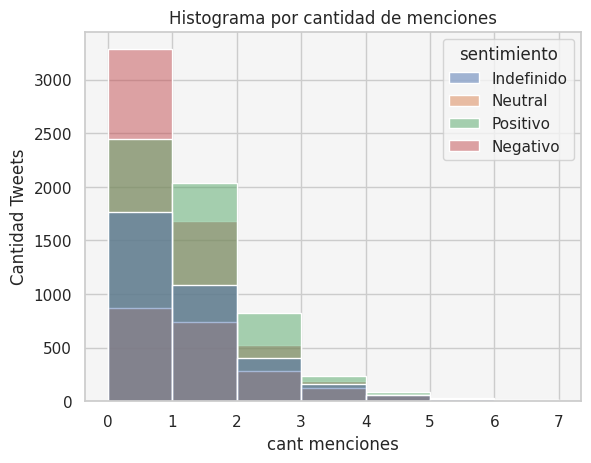

In [13]:
sns.set(style="whitegrid", rc={"axes.facecolor": "#f5f5f5"})
ax = sns.histplot(x='cant menciones', data=sentiment_data, color='#5f78ff', alpha=0.5, binrange=(0, 7),  bins=7, hue='sentimiento').set_title('Histograma por cantidad de menciones')
plt.ylabel('Cantidad Tweets')
plt.show()

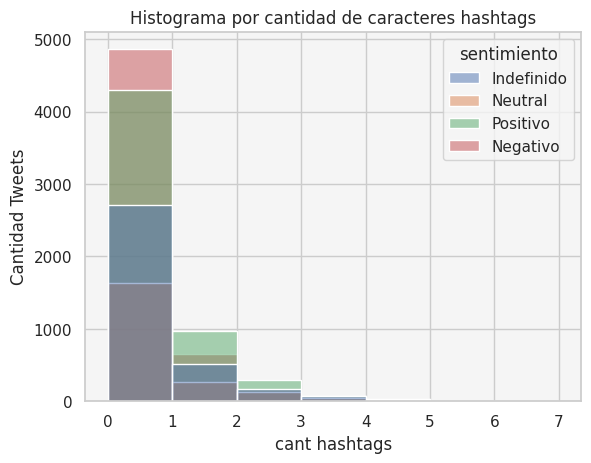

In [14]:
sns.set(style="whitegrid", rc={"axes.facecolor": "#f5f5f5"})
ax = sns.histplot(x='cant hashtags', data=sentiment_data, color='#5f78ff', alpha=0.5, binrange=(0, 7),  bins=7, hue='sentimiento').set_title('Histograma por cantidad de caracteres hashtags')
plt.ylabel('Cantidad Tweets')
plt.show()

In [17]:
import re

def limpiar_texto(sentiment_data):
    texto_unido = ' '.join(sentiment_data['texto'].dropna())
    texto_unido = re.sub(r'==.*?==+', '', texto_unido)
    texto_limpiado = texto_unido.replace('\n', '')
    texto_limpiado = texto_limpiado.replace('t', "")
    texto_limpiado = texto_limpiado.replace('http', "")
    return texto_limpiado

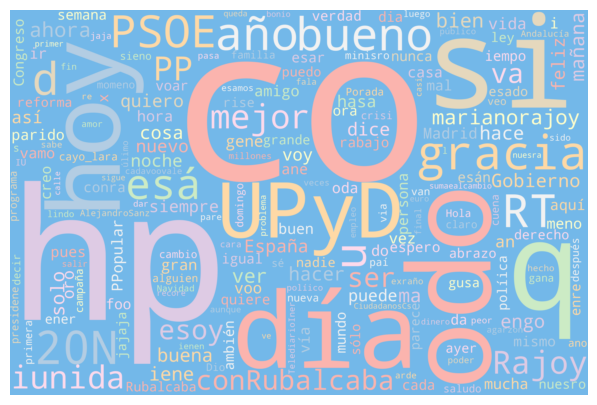

In [20]:
from wordcloud import WordCloud
from nltk.corpus import stopwords


texto_limpiado = limpiar_texto(sentiment_data)
spanish_stopwords = set(stopwords.words('spanish'))
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#73B8E9', colormap='Pastel1', collocations=False, stopwords = spanish_stopwords).generate(texto_limpiado)

plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()